In [1]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('NVDA.csv')
df['date'] = pd.to_datetime(arg=df['date'])
df = df.set_index('date')
df.head()

,open,high,low,close,volume,closeadj,change,pct_chg,sin_time_id,cos_time_id
date,,,,,,,,,,
2014-01-03,3.973,3.980,3.905,3.917,25933200,3.696,0.053,1.353,0.5713,0.866
2014-01-06,3.958,4.000,3.920,3.970,40949200,3.746,0.065,1.637,0.9378,0.866
2014-01-07,4.010,4.050,3.981,4.035,33328800,3.807,0.055,1.363,0.9885,0.866
2014-01-08,4.050,4.110,4.035,4.090,30819200,3.859,-0.152,-3.716,0.9987,0.866
2014-01-09,4.027,4.035,3.925,3.938,29217200,3.715,-0.005,-0.127,0.9681,0.866


In [3]:
train = df.drop(columns = ['change','pct_chg'])
target = df['pct_chg']

train_ratio = 0.75
split_idx = int(len(df) * train_ratio)

xtrain = train[split_idx:]
xtest = train[split_idx:]

ytrain = target[split_idx:]
ytest = target[split_idx:]

In [4]:
xgbr = XGBRegressor(device='cuda', verbosity=0)

In [5]:
xgbr.fit(xtrain, ytrain)
score = xgbr.score(xtrain,ytrain)
print('training score:', score)

training score: 0.9931523454405702


In [6]:
kfold = KFold(n_splits=10, shuffle=True)
cv_score = cross_val_score(xgbr, xtrain,ytrain, cv = 10)
print(f'CV mean{cv_score.mean()}')

CV mean-0.725558552253134


In [7]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print(f'mse: {mse}')
print(f'rmse: {mse**.5}')

mse: 0.08521284738469441
rmse: 0.29191239676432795


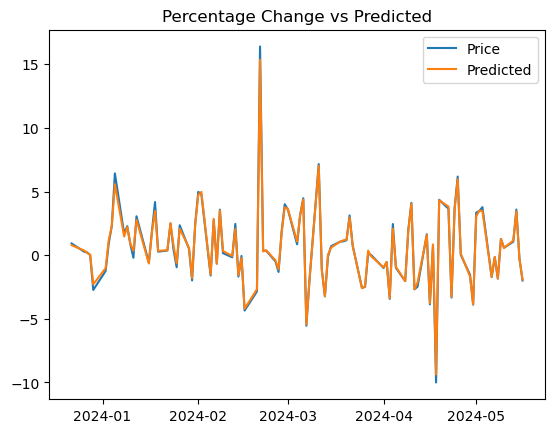

In [8]:
x_ax = range(len(ytest))
# Resize test to last 100 points
x_ax = df.index[-100:]
ytest = ytest[-100:]
ypred = ypred[-100:]

plt.plot(x_ax, ytest, label='Price')
plt.plot(x_ax, ypred, label='Predicted')
plt.title(label='Percentage Change vs Predicted')
plt.legend()
plt.show()

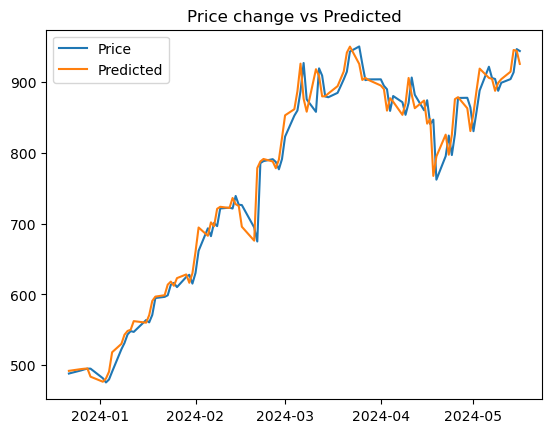

In [9]:
cypred = (ypred/100) * df['close'][-100:]+df['close'][-100:]
actual = (ytest/100) * df['close'][-100:]+df['close'][-100:]

plt.plot(x_ax, df['close'][-100:], label='Price')
plt.plot(x_ax, cypred, label='Predicted')
plt.title(label='Price change vs Predicted')
plt.legend()
plt.show()